Reference: https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e

#Import Libraries

In [29]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#Import Iris Dataset

In [30]:
iris_data = load_iris()

In [35]:
iris_data

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [37]:
X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y = iris_data.target
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


#Train Test Split (80-20)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [46]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


#Scaling our X

In [42]:
sc_X = StandardScaler()

In [43]:
sc_X

StandardScaler()

In [55]:
X_trainscaled=sc_X.fit_transform(X_train)

#Independent train and test dataset are further scaled 
#to make sure that the input data is 
#standard normally distributed are centred around zero 
#and have variance in the same order.

In [47]:
pd.DataFrame(X_trainscaled)

,0,1,2,3
0,0.315537,-0.045789,0.447675,0.233803
1,2.244933,-0.045789,1.297692,1.397429
2,-0.287400,-1.240281,0.051001,-0.154073
3,0.677298,-0.523586,1.014353,1.138845
4,-0.046225,-0.523586,0.731014,1.526721
...,...,...,...,...
115,0.556711,-0.523586,0.731014,0.363094
116,0.677298,0.193110,0.957685,0.750970
117,0.556711,-1.240281,0.617679,0.363094
118,1.039060,0.193110,1.014353,1.526721


In [48]:
X_testscaled=sc_X.transform(X_test)

In [50]:
pd.DataFrame(X_testscaled)

,0,1,2,3
0,-0.046225,2.343195,-1.479029,-1.317699
1,-0.890336,-1.240281,-0.459009,-0.154073
2,0.918473,-0.045789,0.334340,0.233803
3,-0.528574,2.104296,-1.422361,-1.059115
4,2.486107,1.865398,1.467695,1.009554
5,0.556711,0.670906,0.504343,0.492386
6,1.280235,0.193110,0.731014,1.397429
7,-0.890336,1.865398,-1.082354,-1.059115
8,-1.372685,0.432008,-1.252357,-1.317699
9,1.280235,0.432008,1.071021,1.397429


#MLP Classifier

In [56]:
clf = MLPClassifier(hidden_layer_sizes=(256,128,64,32),\
                    activation="relu",\
                    random_state=1).\
                    fit(X_trainscaled, y_train)

In [57]:
clf

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), random_state=1)

#Prediction using X_testscaled

In [53]:
y_pred=clf.predict(X_testscaled)

In [54]:
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

#Prediction Score

In [58]:
print(clf.score(X_testscaled, y_test))

0.9666666666666667


#Plotting the Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


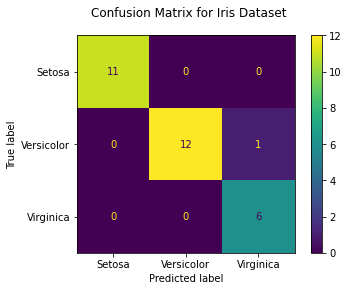

In [59]:
fig=plot_confusion_matrix(clf, X_testscaled, \
                          y_test,\
                          display_labels=["Setosa","Versicolor","Virginica"])
fig.figure_.suptitle("Confusion Matrix for Iris Dataset")
plt.show()